In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def plot_all(x, hidden_output, relu_hidden_output, final_output, final):
    # plotting all 10 graphs in one figure
    plt.figure(figsize=(20, 40))

    plt.subplot(10, 3, 1)
    plt.plot(x, hidden_output[0])
    plt.title('Hidden Layer 1')
    plt.ylim(-2, 2)

    plt.subplot(10, 3, 2)
    plt.plot(x, hidden_output[1])
    plt.title('Hidden Layer 2')
    plt.ylim(-2, 2)

    plt.subplot(10, 3, 3)
    plt.plot(x, hidden_output[2])
    plt.title('Hidden Layer 3')
    plt.ylim(-2, 2)
    
    plt.subplot(10, 3, 4)
    plt.plot(x, relu_hidden_output[0])
    plt.title('Relu Layer 1')
    plt.ylim(-2, 2)

    plt.subplot(10, 3, 5)
    plt.plot(x, relu_hidden_output[1])
    plt.title('Relu Layer 2')
    plt.ylim(-2, 2)

    plt.subplot(10, 3, 6)
    plt.plot(x, relu_hidden_output[2])
    plt.title('Relu Layer 3')
    plt.ylim(-2, 2)

    plt.subplot(10, 3, 7)
    plt.plot(x, final_output[0])
    plt.title('Final Layer 1')
    plt.ylim(-2, 2)

    plt.subplot(10, 3, 8)
    plt.plot(x, final_output[1])
    plt.title('Final Layer 2')
    plt.ylim(-2, 2)

    plt.subplot(10, 3, 9)
    plt.plot(x, final_output[2])
    plt.title('Final Layer 3')
    plt.ylim(-2, 2)

    plt.subplot(10, 3, 11)
    plt.plot(x, final)
    for x in np.arange(0, 1.1, 0.1):
        plt.axvline(x=x, color='red', linestyle='--', linewidth=0.5)
    plt.title('Final Output')
    plt.show()



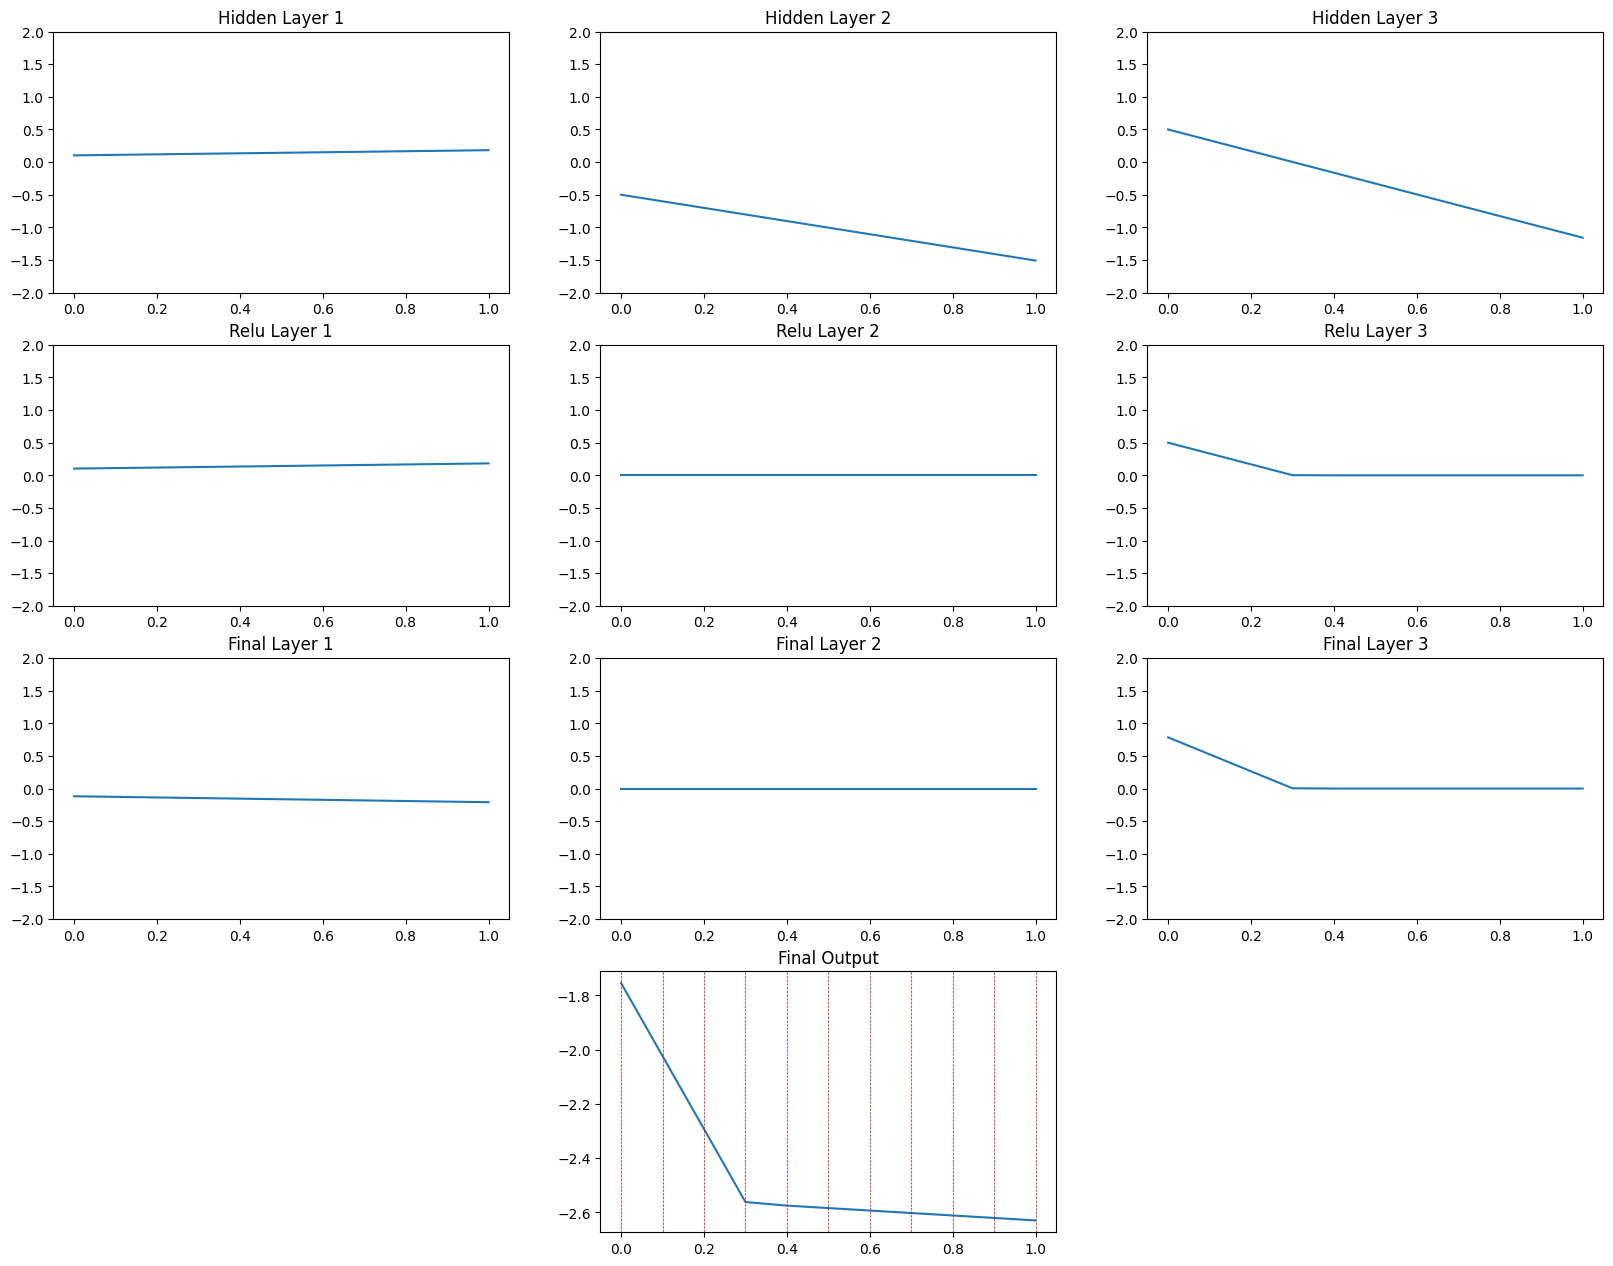

In [47]:
def linear_mapping(x, w, b):
    return np.dot(w, x) + b

def relu(x):
    return np.maximum(x, 0)


#creating np array from 0 to 2 with 10 points
X = np.array([i/10 for i in range(11)])


def net(input, num_hidden, activ='relu'):
    w = np.clip(np.random.randn(num_hidden), -7, 7)
    b = np.clip(np.random.randn(num_hidden), -.5, .5)
    w_final = np.random.randn(num_hidden)
    # creating array of zeros with num_hidden rows and input columns
    hidden_output = np.zeros((num_hidden, len(input)))
    activ_output = np.zeros((num_hidden, len(input)))
    final_output = np.zeros((num_hidden, len(input)))

    for hidden in range(num_hidden):

        hidden_output[hidden] = linear_mapping(input, w[hidden], b[hidden])
        if activ == 'relu':
            activ_output[hidden] = relu(hidden_output[hidden])
        else:
            activ_output[hidden] = hidden_output[hidden]
        final_output[hidden] = linear_mapping(activ_output[hidden], w_final[hidden], 0)

    # summing final_output row wise
    final = np.sum(final_output + np.random.randn(1), axis=0)

    return hidden_output, activ_output, final_output, final

def multi_net(input, num_hidden, layers, activ='relu'):
    hidden_output, activ_output, final_output, final = net(input, num_hidden, activ)
    for i in range(layers-1):
        hidden_output, activ_output, final_output, final = net(final, num_hidden, activ)
    
    return final

hidden_output, activ_output, final_output, final = net(X, 3, 'relu')
plot_all(X, hidden_output, activ_output, final_output, final)


In [37]:
def neural_net(x, layers, nodes, activations):

    for i in range(layers):

        weight = np.random.randn(len(x), nodes[i])
        print(i,x.shape, "x", weight.shape)
        b = np.random.randn(nodes[i])
        activ = activations[i]
        lin_map = np.dot(x, weight) + b
        if activ == 'relu':
            activ_output = relu(lin_map)
        else:
            activ_output = lin_map
        x = activ_output

    return x

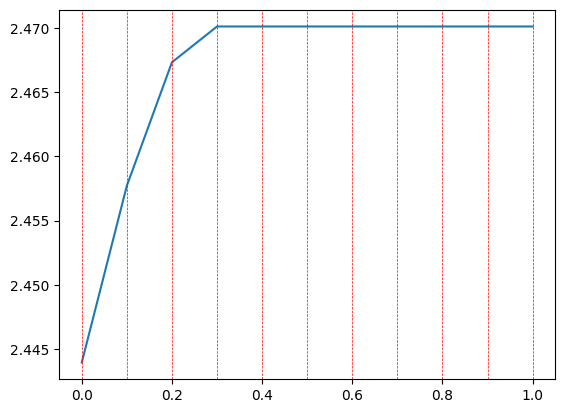

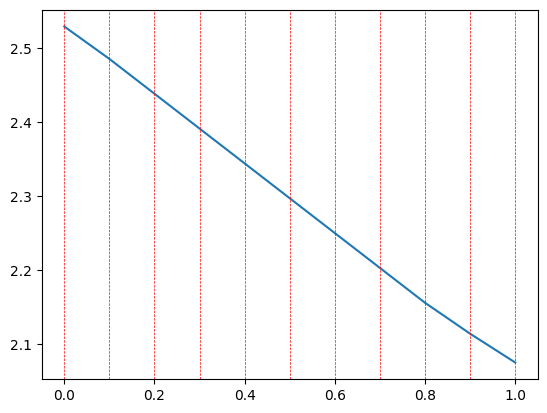

In [55]:
# X = np.array([i/10 for i in range(21)])
# out_1 = neural_net(X, 1, [10], ['relu'])
# out_10 = neural_net(X, 10, [1 for _ in range(10)], ['relu' for _ in range(10)])

uni_final = multi_net(X, 3, 2, 'relu')
multi_final = multi_net(X, 6, 1, 'relu')

plt.plot(X, uni_final)
for x in np.arange(0, 1.1, 0.1):
    plt.axvline(x=x, color='red', linestyle='--', linewidth=0.5)
plt.show()

plt.plot(X, multi_final)
for x in np.arange(0, 1.1, 0.1):
    plt.axvline(x=x, color='red', linestyle='--', linewidth=0.5)
plt.show()
